<a href="https://colab.research.google.com/github/KacperGrodecki/nieruchomosci-mazowieckie/blob/0.0.4/mazowieckie_colab_rysunki_mieszkania_i_analiza_wczytanie_pliku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
from sklearn.metrics import confusion_matrix
from sklearn import svm
import pandas as pd
import numpy as np
np.random.seed(7)
from google.colab import drive
import seaborn as sns
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import pandas as pd
#from otoDomScraper import daneDomu
#from random import randrange
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import statistics
from sklearn.cluster import AffinityPropagation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.decomposition import FastICA
from sklearn import preprocessing
from IPython.display import Javascript
import requests
from collections import OrderedDict
import seaborn as sns
from sklearn import preprocessing
import cufflinks

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
pip install plotly==4.14.3

In [185]:
pip install chart-studio

In [186]:
pip install cufflinks plotly

In [187]:
from plotly.offline import iplot, init_notebook_mode

cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default='notebook'
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.graph_objs as go
from plotly import tools

In [188]:
filename='/content/drive/My Drive/domymazowieckie/dfMieszkania_analysis_final.csv'

In [189]:
final=pd.read_csv(filename,index_col=0)

In [190]:
final.head()

,lPokoi,rodzajZabudowy,materialBudynku,stanWykonczenia,okna,rynek,powierzchnia_corr,powierzchniaDzialki_corr,rokBudowy_corr,cena/m,lPieter_crr,locationX,locationY
0,2,blok,inne,do zamieszkania,plastikowe,wtórny,59.70,0,2012,16566.164154,6,20.933889,52.288889
1,2,apartamentowiec,0,0,0,pierwotny,44.44,0,1980,11300.000000,3,NaN,NaN
2,4,0,0,0,0,pierwotny,91.00,0,2021,13571.439560,0,20.957222,52.233333
3,2,0,0,do zamieszkania,0,wtórny,38.00,0,1977,12763.157895,12,20.933889,52.288889
4,4,blok,pustak,do wykończenia,drewniane,pierwotny,74.50,0,2022,8912.751678,3,20.884190,52.195170


In [191]:
final=final[final['powierzchnia_corr']<500]
final=final[final['powierzchniaDzialki_corr']<5000]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



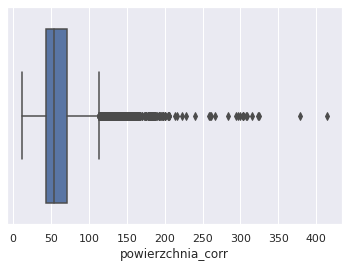

In [192]:
sns.boxplot(final['powierzchnia_corr'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



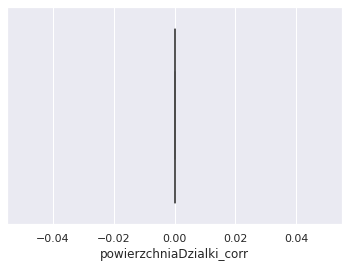

In [193]:
sns.boxplot(final['powierzchniaDzialki_corr'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



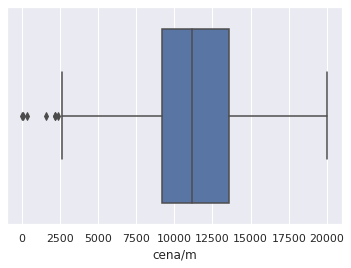

In [194]:
sns.boxplot(final['cena/m'])

In [195]:
final_plots=final.copy()

In [196]:
dummies = pd.get_dummies(final_plots, columns=['rodzajZabudowy', 'materialBudynku', 'stanWykonczenia', 'okna', 'rynek'])

In [197]:
from sklearn.cluster import KMeans

In [198]:
final_plots.head()

,lPokoi,rodzajZabudowy,materialBudynku,stanWykonczenia,okna,rynek,powierzchnia_corr,powierzchniaDzialki_corr,rokBudowy_corr,cena/m,lPieter_crr,locationX,locationY
0,2,blok,inne,do zamieszkania,plastikowe,wtórny,59.70,0,2012,16566.164154,6,20.933889,52.288889
1,2,apartamentowiec,0,0,0,pierwotny,44.44,0,1980,11300.000000,3,NaN,NaN
2,4,0,0,0,0,pierwotny,91.00,0,2021,13571.439560,0,20.957222,52.233333
3,2,0,0,do zamieszkania,0,wtórny,38.00,0,1977,12763.157895,12,20.933889,52.288889
4,4,blok,pustak,do wykończenia,drewniane,pierwotny,74.50,0,2022,8912.751678,3,20.884190,52.195170


In [226]:
final_plots['rodzajZabudowy'].unique()

array(['blok', 'apartamentowiec', '0', 'kamienica', 'szeregowiec',
       'dom wolnostojący', 'loft', 'plomba'], dtype=object)

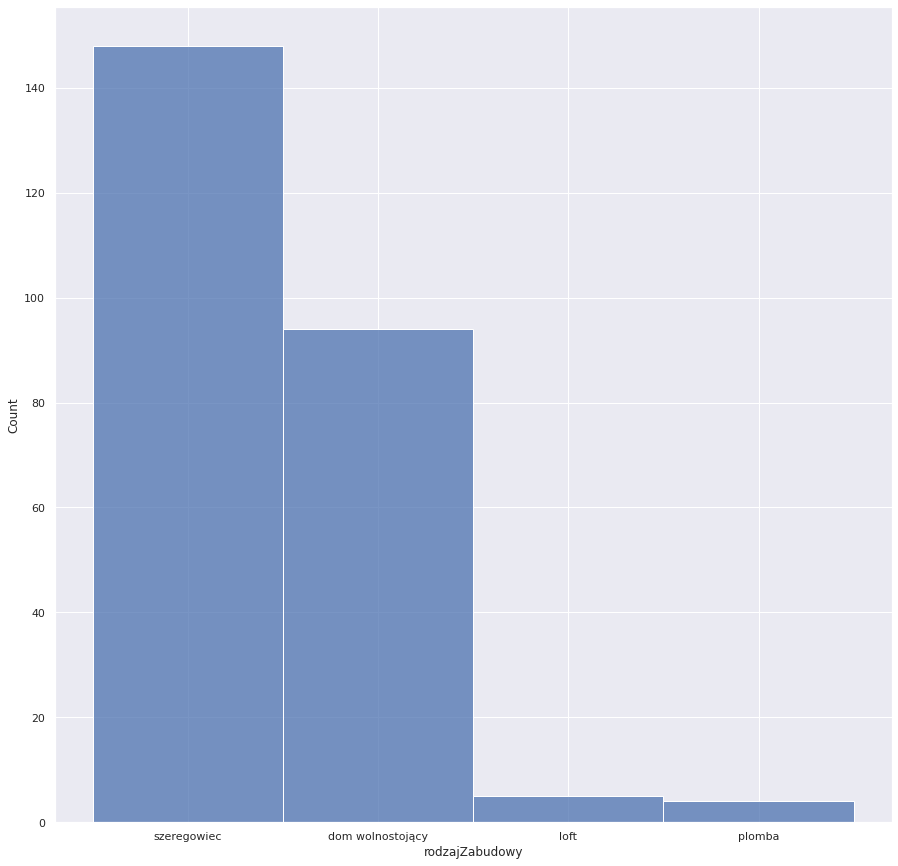

In [232]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(data=final_plots[(final_plots['rodzajZabudowy']!='blok')&(final_plots['rodzajZabudowy']!='kamienica')&
                                 (final_plots['rodzajZabudowy']!='0')&(final_plots['rodzajZabudowy']!='apartamentowiec')], x="rodzajZabudowy")

In [238]:
final_plots=final_plots[final_plots['rodzajZabudowy']!='loft']
final_plots=final_plots[final_plots['rodzajZabudowy']!='plomba']

In [234]:
final_plots['materialBudynku'].unique()

array(['inne', '0', 'pustak', 'wielka płyta', 'cegła', 'żelbet', 'beton',
       'beton komórkowy', 'silikat', 'keramzyt', 'drewno'], dtype=object)

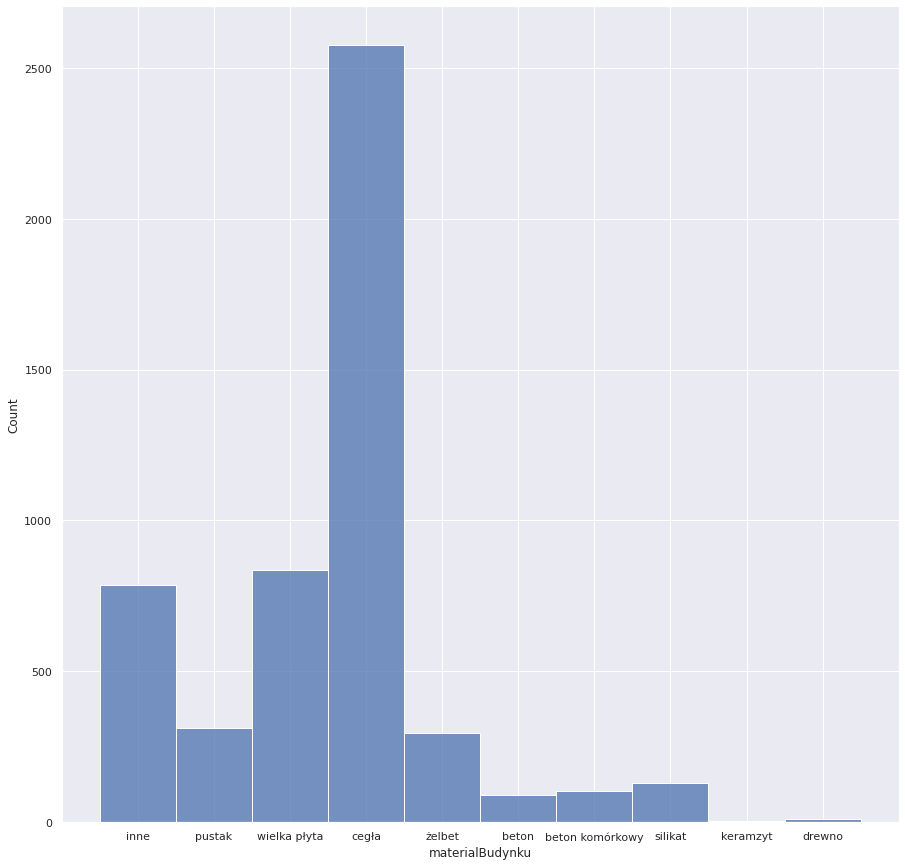

In [236]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(data=final_plots[(final_plots['materialBudynku']!='blok')&(final_plots['materialBudynku']!='kamienica')&
                                 (final_plots['materialBudynku']!='0')&(final_plots['materialBudynku']!='apartamentowiec')], x="materialBudynku")

In [268]:
final_plots=final_plots[final_plots['materialBudynku']!='keramzyt']
final_plots=final_plots[final_plots['materialBudynku']!='drewno']

In [269]:
final_plots['materialBudynku'].unique()

array(['inne', '0', 'pustak', 'wielka płyta', 'cegła', 'żelbet', 'beton',
       'beton komórkowy', 'silikat'], dtype=object)

In [270]:
df=pd.DataFrame()

In [271]:
final_plots1=final_plots[['powierzchnia_corr','cena/m']].copy()#'lPokoi','lPieter_crr',,'powierzchniaDzialki_corr','rokBudowy_corr',,'locationX','locationY'
#df['lPokoi']=final_plots.loc[:,'lPokoi']/10
df["powierzchnia_corr"]=np.log(final_plots1["powierzchnia_corr"])/3-1
#df["powierzchniaDzialki_corr"]=np.log(final_plots["powierzchniaDzialki_corr"]+1)/14
#df["rokBudowy_corr"]=np.power(final_plots["rokBudowy_corr"]-1899,4)/3e8
df["cena/m"]=final_plots1["cena/m"]/20000
#df["locationX"]=(final_plots["locationX"]-21)/4
#df["locationY"]=(final_plots["locationY"]-52)/4
#df['lPieter_crr']=final_plots.loc[:,'lPieter_crr']/10

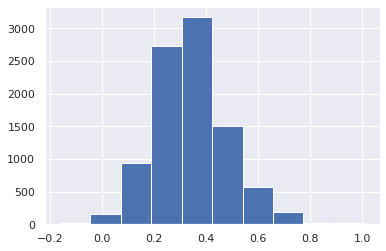

In [272]:
df["powierzchnia_corr"].hist()

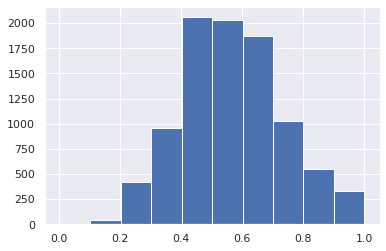

In [273]:
df["cena/m"].hist()

In [274]:
print(df.shape)
print(dummies.shape)

(9293, 2)
(9312, 37)


In [275]:
df.isna().sum()

powierzchnia_corr    0
cena/m               0
dtype: int64

In [276]:
values=[]
for i in [2,3,4,5,6,7,8,9,10,11,12,13,14]:
  kmeans = KMeans(n_clusters=i, random_state=0).fit(df.values)
  values.append(kmeans.score(df.values))

In [277]:
print(np.abs(values))
print(values)

[262.94300151 186.49033206 148.09119657 127.2918686  106.82504086
  92.78236384  80.02012253  71.6243606   64.25188098  59.49518449
  54.80638899  50.735505    47.01326651]
[-262.9430015065913, -186.49033205585505, -148.0911965730581, -127.29186860088579, -106.8250408556382, -92.78236384181551, -80.02012253476151, -71.624360601566, -64.25188097783652, -59.4951844905644, -54.80638899397509, -50.735504997552724, -47.013266514344814]


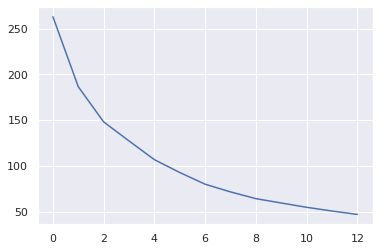

In [278]:
plt.plot(np.abs(values))

In [279]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(df.values)


In [280]:
final_plots['kmean']=kmeans.predict(df.values)

In [281]:
final_plots.head(10)

,lPokoi,rodzajZabudowy,materialBudynku,stanWykonczenia,okna,rynek,powierzchnia_corr,powierzchniaDzialki_corr,rokBudowy_corr,cena/m,lPieter_crr,locationX,locationY,kmean,powierzchnia_cat,powierzchniaDzialki_cat,rokBudowy_cat,locationX_cat,locationY_cat
0,2,blok,inne,do zamieszkania,plastikowe,wtórny,59.70,0,2012,16566.164154,6,20.933889,52.288889,0,50,0,2010,20,52
1,2,apartamentowiec,0,0,0,pierwotny,44.44,0,1980,11300.000000,3,0.000000,0.000000,4,0,0,1980,0,0
2,4,0,0,0,0,pierwotny,91.00,0,2021,13571.439560,0,20.957222,52.233333,3,50,0,2020,20,52
3,2,0,0,do zamieszkania,0,wtórny,38.00,0,1977,12763.157895,12,20.933889,52.288889,2,0,0,1970,20,52
4,4,blok,pustak,do wykończenia,drewniane,pierwotny,74.50,0,2022,8912.751678,3,20.884190,52.195170,1,50,0,2020,20,52
5,3,apartamentowiec,0,do zamieszkania,aluminiowe,wtórny,107.40,0,2004,12942.281192,10,0.000000,0.000000,3,100,0,2000,0,0
6,3,blok,wielka płyta,do remontu,plastikowe,wtórny,61.70,0,1970,9708.265802,10,20.933889,52.288889,5,50,0,1970,20,52
7,3,0,0,do zamieszkania,0,wtórny,82.00,0,2004,14085.378049,16,20.981111,52.216389,3,50,0,2000,20,52
8,1,kamienica,cegła,do zamieszkania,plastikowe,wtórny,26.90,0,1938,14498.141264,4,21.028333,52.263333,2,0,0,1930,21,52
9,4,blok,0,0,0,wtórny,80.02,0,1998,11247.188203,17,20.957222,52.233333,4,50,0,1990,20,52


In [282]:
final_plots=final_plots.replace(np.nan, 0)

In [283]:
final_plots['powierzchnia_cat']=(final_plots['powierzchnia_corr']/50).astype(int)*50
final_plots['powierzchniaDzialki_cat']=(final_plots['powierzchniaDzialki_corr']/500).astype(int)*500
final_plots['rokBudowy_cat']=(final_plots['rokBudowy_corr']/10).astype(int)*10

In [284]:
final_plots['locationX_cat']=(final_plots['locationX']).astype(int)
final_plots['locationY_cat']=(final_plots['locationY']).astype(int)

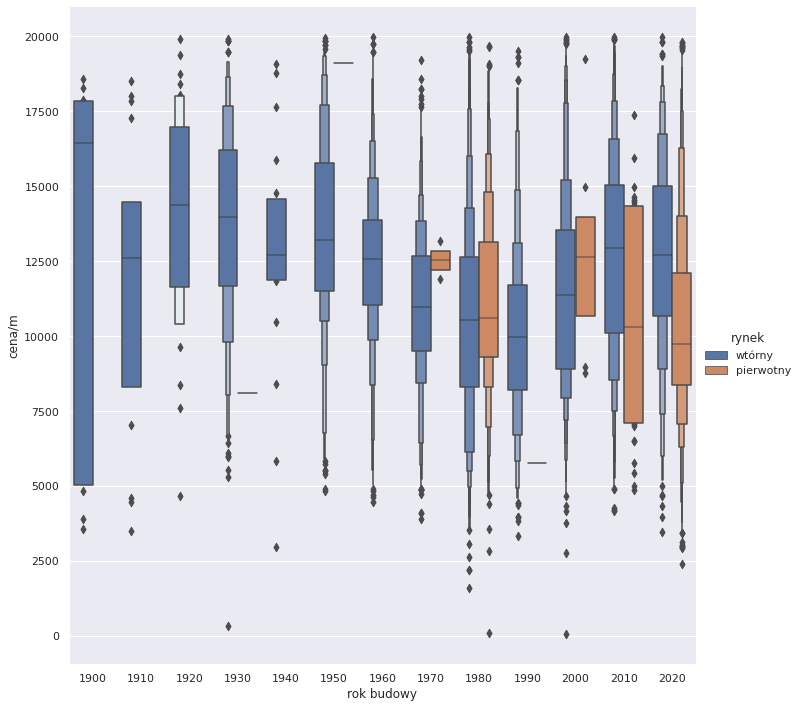

In [285]:
sns.set(font_scale = 1)
ax=sns.catplot(x="rokBudowy_cat", y="cena/m", hue ='rynek',kind="boxen", data=final_plots,height=10)
ax.set(xlabel='rok budowy', ylabel='cena/m')
plt.show()

In [286]:
final_plots_logic=final_plots.copy()

In [287]:
final_plots_logic.loc[(final_plots_logic['rynek']=='pierwotny') & (final_plots_logic['rokBudowy_corr']<2010),'rynek']='wtórny'

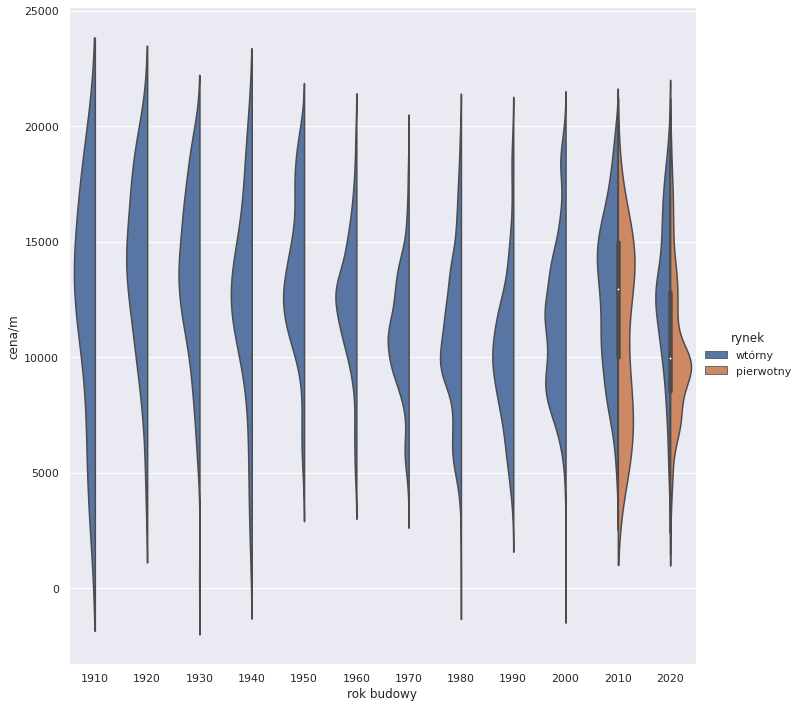

In [306]:
sns.set(font_scale = 1)
ax=sns.catplot(x="rokBudowy_cat", y="cena/m", hue ='rynek',kind="violin", data=final_plots_logic[final_plots_logic['rokBudowy_corr']>1910],height=10,split=True)
ax.set(xlabel='rok budowy', ylabel='cena/m')
plt.show()

[Text(0, 0.5, 'liczba'), Text(0.5, 0, 'rok budowy')]

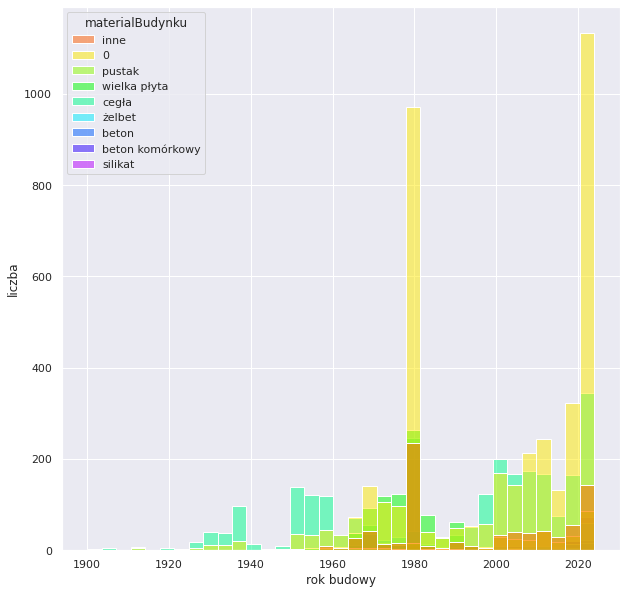

In [316]:
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.histplot(data=final_plots_logic, x="rokBudowy_corr",hue='materialBudynku',palette='gist_rainbow')
ax.set(xlabel='rok budowy', ylabel='liczba')

[Text(0, 0.5, 'liczba'), Text(0.5, 0, 'rok budowy')]

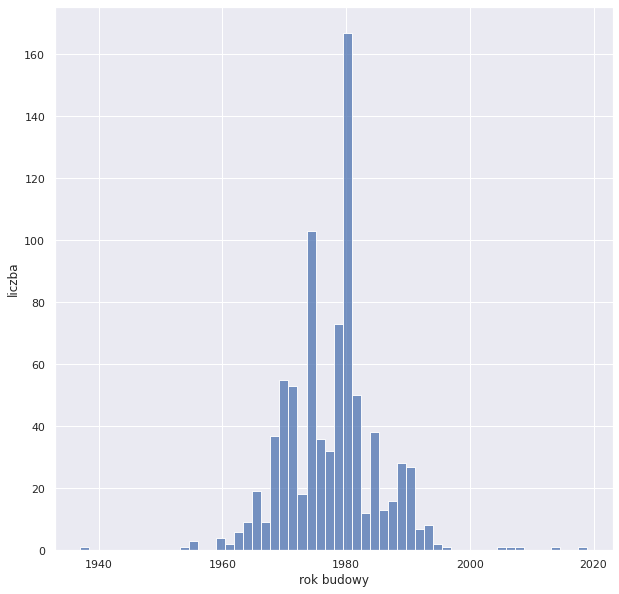

In [317]:
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.histplot(data=final_plots_logic[final_plots_logic['materialBudynku']=='wielka płyta'], x="rokBudowy_corr",palette='gist_rainbow')
ax.set(xlabel='rok budowy', ylabel='liczba')

[Text(0, 0.5, 'liczba'), Text(0.5, 0, 'rok budowy')]

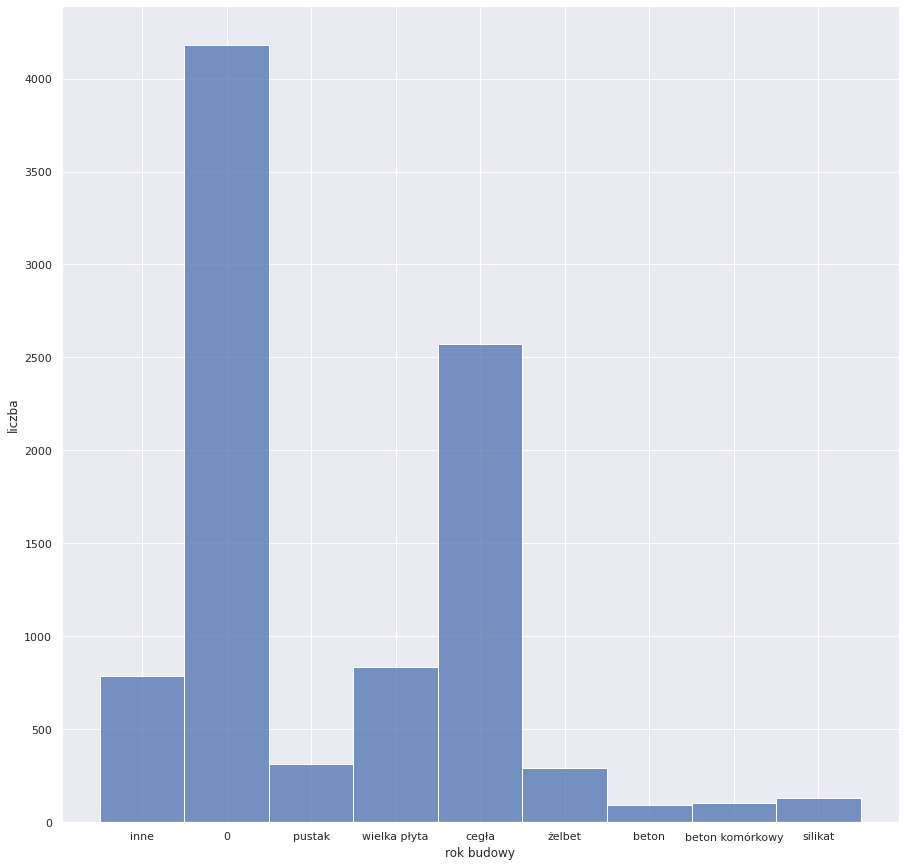

In [313]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(data=final_plots_logic, x="materialBudynku")
ax.set(xlabel='rok budowy', ylabel='liczba')

In [289]:
trace0 = go.Box(
    x=final_plots[final_plots['rynek']=='wtórny'].loc[:,'rokBudowy_cat'],
    y=final_plots.loc[:,'cena/m'],
    name = 'rynek wtórny',
    marker = dict(
        color = 'red',
    
    )
)
trace1 = go.Box(
    x=final_plots[final_plots['rynek']=='pierwotny'].loc[:,'rokBudowy_cat'],
    y=final_plots.loc[:,'cena/m'],
    name = 'rynek pierwotny',
    marker = dict(
        color = 'blue',
    
    )
)
layout = go.Layout(
    title = "Przykład"
)
data = [trace0,trace1]
fig = go.Figure(data=data,layout=layout)
fig.show(renderer="colab")

nieruchomości z lat 60-90 jako rynek pierwotny???

powierzchnia dzialki ok 0 i to ma sens

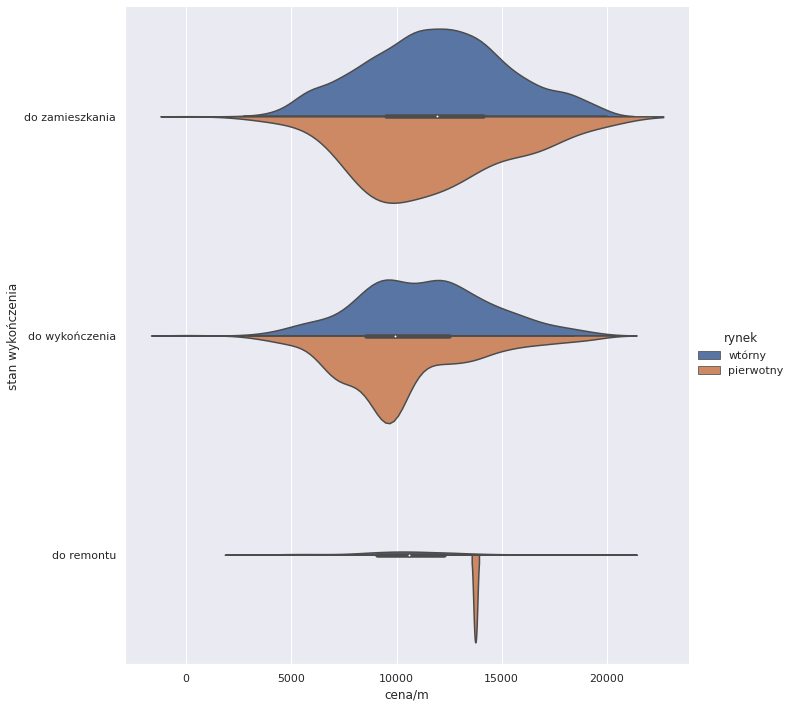

In [290]:
ax=sns.catplot(y="stanWykonczenia", x="cena/m", kind="violin", data=final_plots_logic[final_plots_logic['stanWykonczenia']!='0'],height=10,hue='rynek',split=True)
ax.set(ylabel='stan wykończenia', xlabel='cena/m')
plt.show()

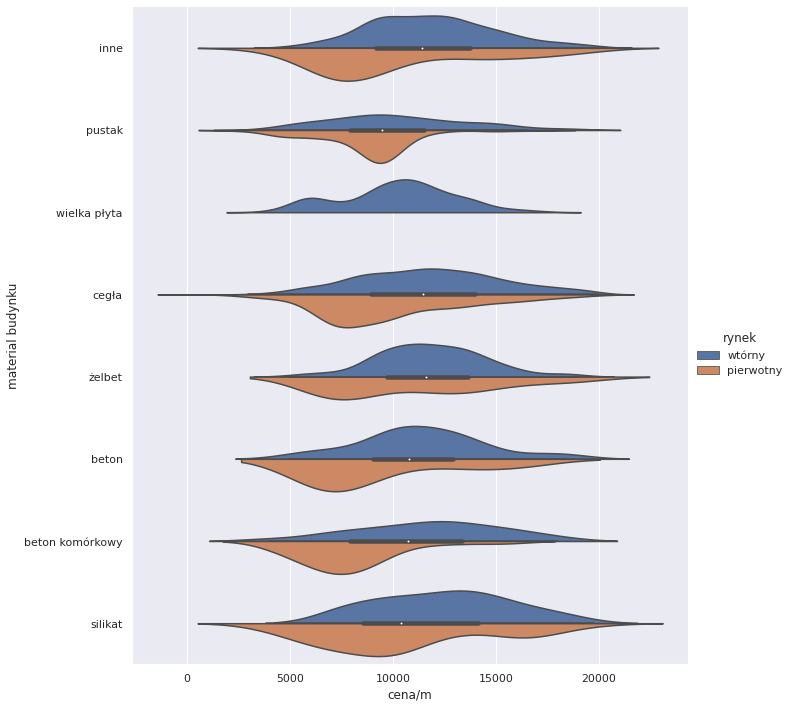

In [291]:
ax=sns.catplot(y="materialBudynku", x="cena/m", kind="violin", data=final_plots_logic[final_plots_logic['materialBudynku']!='0'],height=10,hue='rynek',split=True)#hue="kmean"
ax.set(ylabel='material budynku', xlabel='cena/m')
plt.show()

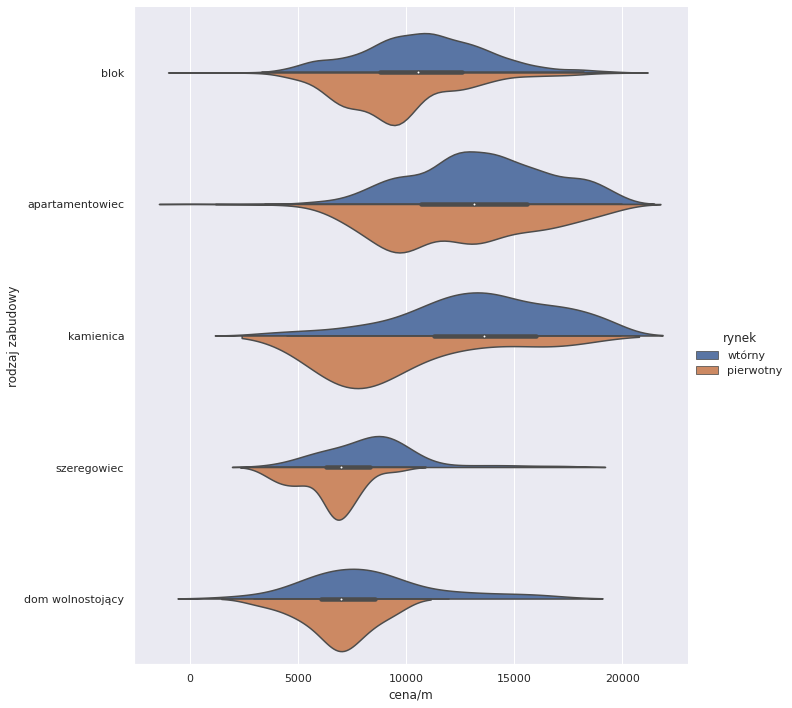

In [292]:
ax=sns.catplot(y="rodzajZabudowy", x="cena/m",  kind="violin", data=final_plots_logic[final_plots_logic['rodzajZabudowy']!='0'],height=10,hue='rynek',split=True)
ax.set(ylabel='rodzaj zabudowy', xlabel='cena/m')
plt.show()

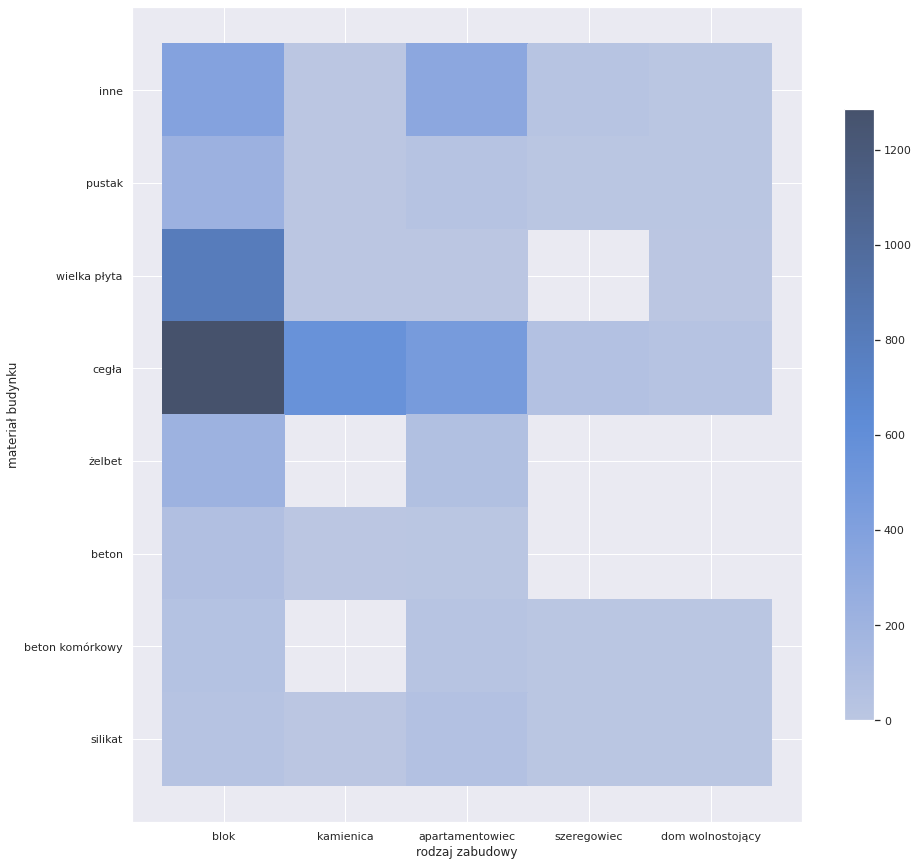

In [305]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(y='materialBudynku',x="rodzajZabudowy",data=final_plots[(final_plots['rodzajZabudowy']!='0') 
&(final_plots['materialBudynku']!='0')&(final_plots['materialBudynku']!='0')],
                 cbar_kws=dict(shrink=.75),cbar=True,palette='cmap')
ax.set(ylabel='materiał budynku', xlabel='rodzaj zabudowy')
plt.show() 

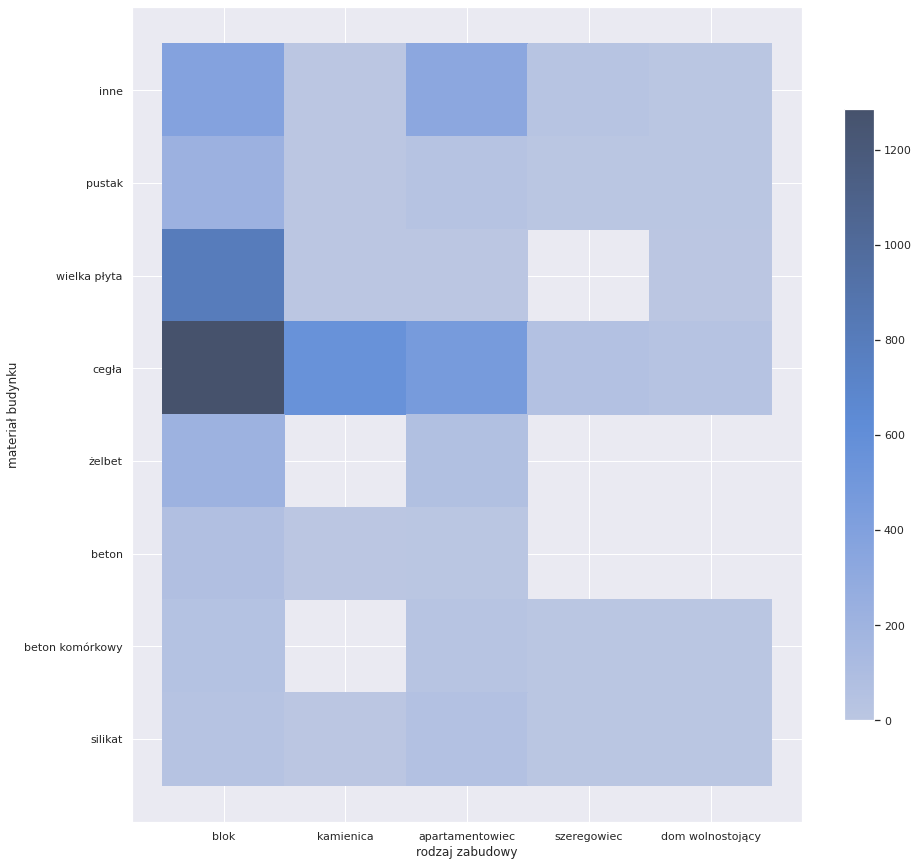

In [293]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(y='materialBudynku',x="rodzajZabudowy",data=final_plots_logic[(final_plots_logic['rodzajZabudowy']!='0') 
&(final_plots_logic['materialBudynku']!='0')&(final_plots_logic['materialBudynku']!='0')],
                 cbar_kws=dict(shrink=.75),cbar=True,palette='cmap')
ax.set(ylabel='materiał budynku', xlabel='rodzaj zabudowy')
plt.show() 

In [295]:
final_plots_logic['cena/m_cat']=(final_plots_logic['cena/m']/2000).astype(int)*2000

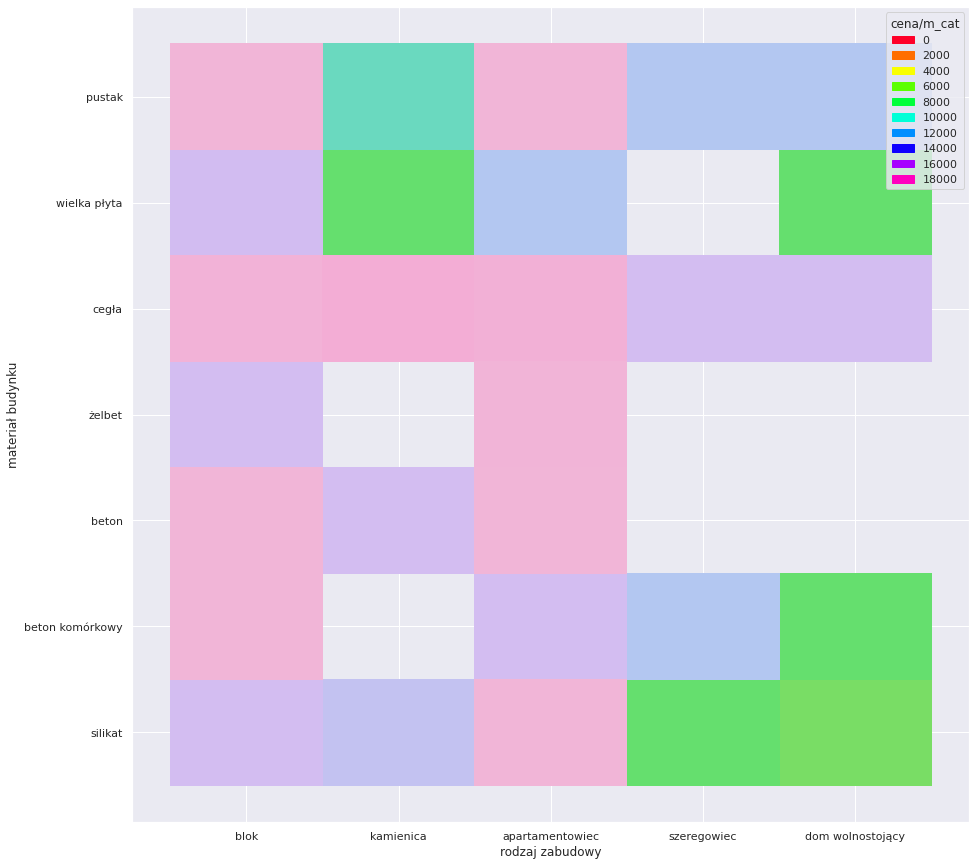

In [301]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(y='materialBudynku',x="rodzajZabudowy",data=final_plots[(final_plots_logic['rodzajZabudowy']!='0') &(final_plots_logic['materialBudynku']!='inne') &(final_plots_logic['materialBudynku']!='0')],
                 hue='cena/m_cat',palette='gist_rainbow')
ax.set(ylabel='materiał budynku', xlabel='rodzaj zabudowy')
plt.show() 

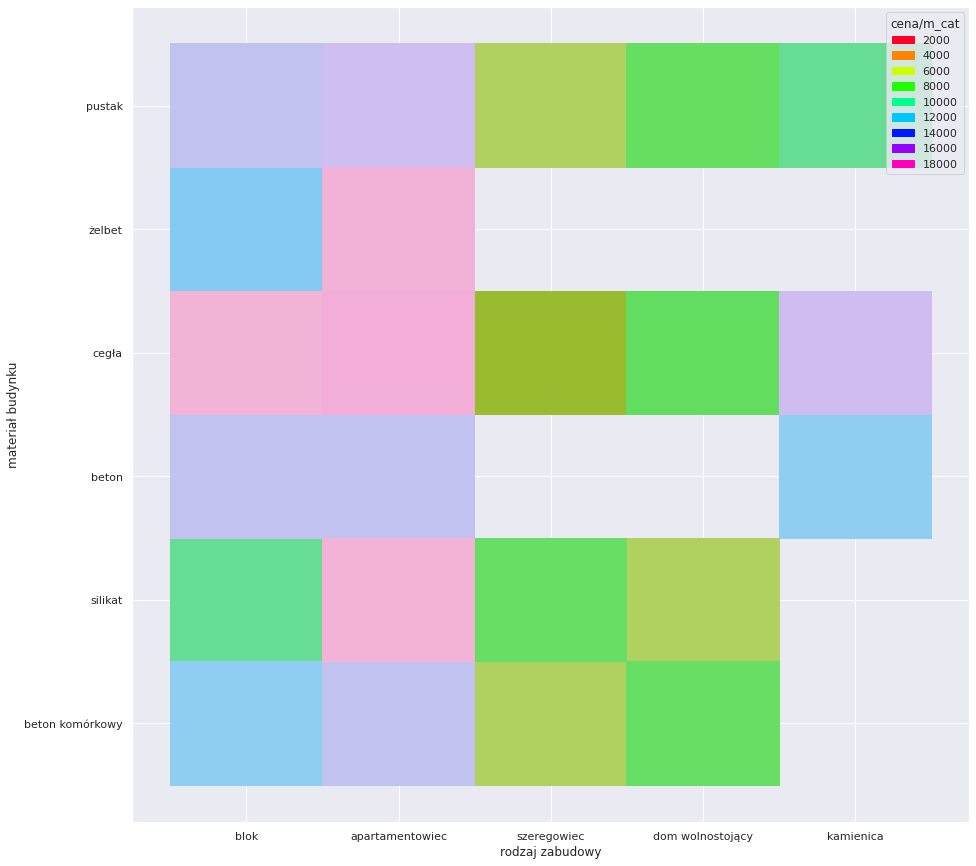

In [303]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(y='materialBudynku',x="rodzajZabudowy",data=final_plots_logic[(final_plots_logic['rodzajZabudowy']!='0') &(final_plots_logic['materialBudynku']!='inne') 
&(final_plots_logic['materialBudynku']!='0')&(final_plots_logic['rynek']=='pierwotny')],
                 hue='cena/m_cat',palette='gist_rainbow')
ax.set(ylabel='materiał budynku', xlabel='rodzaj zabudowy')
plt.show() 

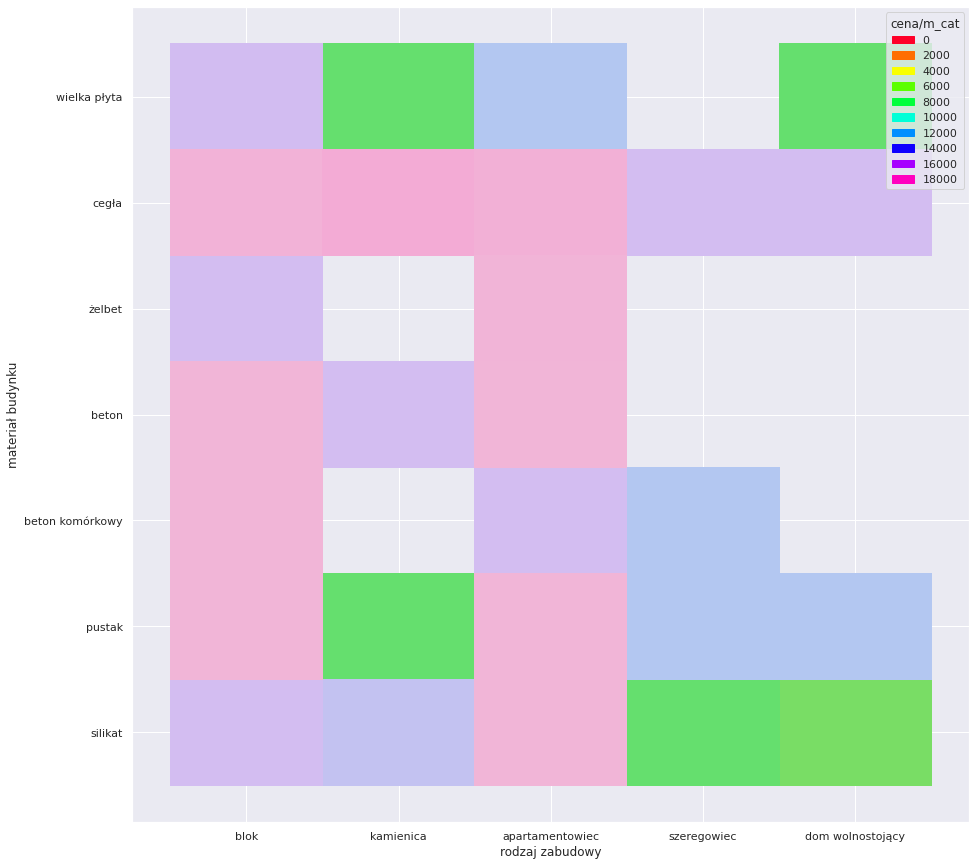

In [304]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(y='materialBudynku',x="rodzajZabudowy",data=final_plots_logic[(final_plots_logic['rodzajZabudowy']!='0') &(final_plots_logic['materialBudynku']!='inne') 
&(final_plots_logic['materialBudynku']!='0')&(final_plots_logic['rynek']=='wtórny')],
                 hue='cena/m_cat',palette='gist_rainbow')
ax.set(ylabel='materiał budynku', xlabel='rodzaj zabudowy')
plt.show() 